# Importowanie wymaganych bibliotek
Importowanie bibliotek takich jak pandas, numpy, matplotlib, seaborn oraz scikit-learn.

In [8]:
# Importowanie wymaganych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Wczytywanie i przeglądanie danych
Wczytywanie danych z pliku CSV i przeglądanie pierwszych kilku wierszy danych.

In [9]:
# Wczytywanie danych z pliku CSV
data = pd.read_csv('heart.csv')

# Zmiana nazw kolumn na polskie
data.columns = [
    'wiek', 'płeć', 'ból_w_klatce', 'ciśnienie_krwi', 'cholesterol', 
    'cukier_we_krwi', 'wynik_EKG', 'tętno', 'ból_wysiłkowy', 
    'depresja_ST', 'nachylenie_ST', 'naczynia', 'thal', 'choroba_serca'
]

# Przeglądanie pierwszych kilku wierszy danych
data.head()

,wiek,płeć,ból_w_klatce,ciśnienie_krwi,cholesterol,cukier_we_krwi,wynik_EKG,tętno,ból_wysiłkowy,depresja_ST,nachylenie_ST,naczynia,thal,choroba_serca
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Podstawowa analiza danych
Analiza statystyczna danych, sprawdzenie brakujących wartości oraz rozkład zmiennych.

# Przygotowanie danych do modelowania
Przygotowanie danych, w tym kodowanie zmiennych kategorycznych, skalowanie danych oraz podział na zbiór treningowy i testowy.

In [10]:
# Przygotowanie danych
X = data.drop('choroba_serca', axis=1)
y = data['choroba_serca']

# Skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Trenowanie modelu klasyfikacyjnego
Trenowanie modelu klasyfikacyjnego, takiego jak regresja logistyczna, na danych treningowych.

In [11]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilacja modelu
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trenowanie modelu
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50


d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6653 - loss: 0.6144  
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8435 - loss: 0.4109  
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.3494  
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8911 - loss: 0.2871  
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9005 - loss: 0.2782  
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9134 - loss: 0.2411  
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9257 - loss: 0.2375  
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9134 - loss: 0.2202  
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9194 - loss: 0.2114  
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9208 - loss: 0.1940  
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9145 - loss: 0.2022  
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

# Ewaluacja modelu
Ewaluacja modelu na zbiorze testowym za pomocą metryk takich jak dokładność, precyzja, recall oraz F1-score.

In [12]:
# Przewidywanie na zbiorze testowym
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Wyświetlenie wyników
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.9853658536585366
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Wizualizacja wyników
Wizualizacja wyników modelu za pomocą wykresów, takich jak macierz pomyłek oraz ROC curve.

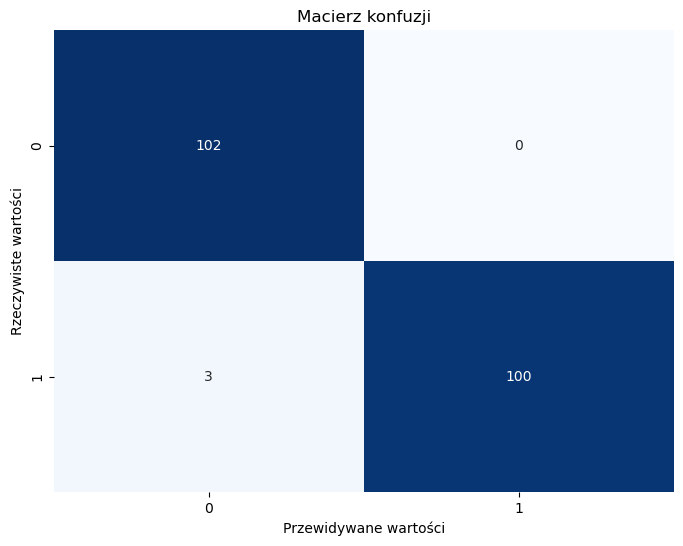

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [13]:
# Wizualizacja wyników

# Wizualizacja macierzy konfuzji
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Obliczanie prawdopodobieństw przewidywań
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Obliczanie wartości FPR, TPR i progów
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Obliczanie AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Wizualizacja ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()